# Lecture 13: Monte Carlo Integration

## Curse of Dimensionality

For nested quadrature, the error behaves as
$$
E \sim \frac{1}{N_{\text{eval}}^{n/D}},
$$

where $D$ is the dimension of the space we want to integrate,
and $n=1$ for the Rectangular rule, $n=2$ for the trapezoid rule, and $n=4$ for Simpson's rule.

In [1]:
using PyPlot
PyPlot.svg(true)

true

In [2]:
function rectangular_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.0
    for n=0:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

rectangular_rule (generic function with 1 method)

In [7]:
# f(x, y) = x*y
f(x) = x[1]*x[2]

function nested_rect_2d(f, a, b, N)
    # inner integral
    F(x_1) = rectangular_rule(x_2 -> f([x_1, x_2]), a, b, N)

    # outer integral
    return rectangular_rule(F, a, b, N)
end

nested_rect_2d(f, 0.0, 1.0, 5000)

0.24990000999999998

In [8]:
# estimate error
exact = 0.25

Ns = 10.0.^(1:0.25:4)

approximations = [nested_rect_2d(f, 0.0, 1.0, Int64(trunc(N))) for N in Ns]
errors = abs.((approximations .- exact)/exact)

13-element Array{Float64,1}:
 0.18999999999999984   
 0.11418685121107264   
 0.06347554630593122   
 0.03539540816326492   
 0.01990000000000003   
 0.011267515720259302  
 0.0063190995032849084 
 0.003555552741226986  
 0.001998999999999973  
 0.001124543065412209  
 0.0006324110513807879 
 0.00035565039285012645
 0.00019998999999970568

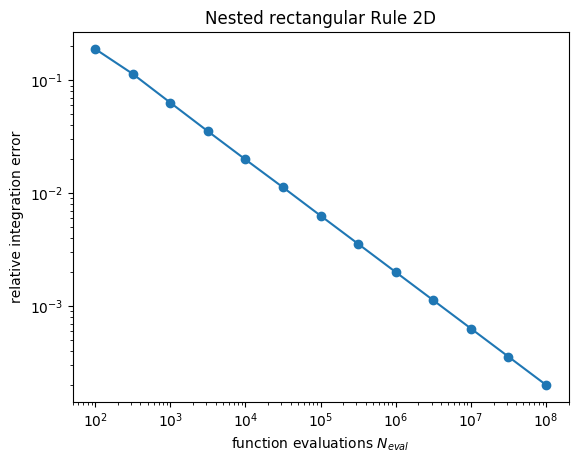

PyObject Text(0.5, 1.0, 'Nested rectangular Rule 2D')

In [9]:
figure()
loglog(Ns.^2, errors, "o-")
xlabel(L"function evaluations $N_{eval}$")
ylabel("relative integration error")
title("Nested rectangular Rule 2D")

In [12]:
using Polynomials

# Slope -1/2!
polyfit(log10.(Ns.^2), log10.(errors), 1)

Poly(0.293942813759865 - 0.4988656927814785*x)

In [13]:
# Now go to 3D

# f(x,y,z) = x*y*z
f(x) = x[1]*x[2]*x[3]

function nested_rect_3d(f, a, b, N)
    # inner integral
    F(x_1) = nested_rect_2d(x_2 -> f([x_1, x_2[1], x_2[2]]), a, b, N)

    # outer integral
    return rectangular_rule(F, a, b, N)
end

nested_rect_3d(f, 0.0, 1.0, 200)

0.12313435937500002

In [14]:
exact = 1/8
Ns = 10.0.^(1:0.25:2.75)

approximations = [nested_rect_3d(f, 0.0, 1.0, Int64(trunc(N))) for N in Ns]
errors = abs.((approximations .- exact)/exact)

8-element Array{Float64,1}:
 0.2709999999999998  
 0.16629350702218604 
 0.09368601255412734 
 0.052620490160350086
 0.029700999999999755
 0.016853574953478168
 0.009463659314983275
 0.005328585565530952

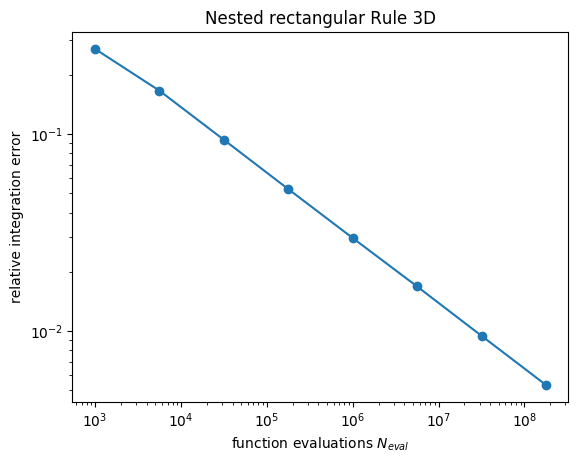

PyObject Text(0.5, 1.0, 'Nested rectangular Rule 3D')

In [15]:
figure()
loglog(Ns.^3, errors, "o-")
xlabel(L"function evaluations $N_{eval}$")
ylabel("relative integration error")
title("Nested rectangular Rule 3D")

In [16]:
# Slope -1/3!
polyfit(log10.(Ns.^3), log10.(errors), 1)

Poly(0.4375219734619315 - 0.32780816466650275*x)

## Computing the volume of the unit ball in $D$-D

We want to compute the volume of
$$
B_D = \{\mathbf{x}\in \mathbb{R}^D \mid \|\mathbf{x}\| < 1\}
$$

The characteristic function is
$$
\chi(\mathbf{x}) = \begin{cases}
1, & \|\mathbf{x}\| < 1 \\
0, & \text{otherwise.}
\end{cases}
$$

This means we want to compute
$$
V = \int_R \chi(\mathbf{x})\, d\mathbf{x},
$$

where $R$ is any region containing the unit ball, for instance
a hypercube $[-1, 1]^D$.

In [17]:
# Characteristic Function for the Ball
using LinearAlgebra

χ_Ball(x) = norm(x) < 1.0 ? 1.0 : 0.0

χ_Ball (generic function with 1 method)

In [18]:
function integrate_mc(f, a, b, N)
    """ Integrate f over the hypercube [a[1], b[1]] × ... × [a[D], b[D]]
    with N samples using Monte Carlo integration.
    """
    D = length(a)
    
    S = 0.0
    
    # volume of the hypercube V = (b_1 - a_1)×(b_2 - a_2)× ... × (b_D - a_D)
    V = prod(b .- a)
    
    for i=1:N
        # sample a point uniformly from [0, 1]×...×[0,1]
        x = rand(D)
        
        # scale to [a[1], b[1]] × ... × [a[D], b[D]]
        x = a .+ (b .- a).*x
        
        S += f(x)
    end
    
    return S.* (V/N)
end

integrate_mc (generic function with 1 method)

In [21]:
# Volume of B^3

integrate_mc(χ_Ball, [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0], 100000)

4.1950400000000005

In [20]:
exact = 4π/3

4.1887902047863905

In [22]:
# compute approximations with various N

appr_1 = [integrate_mc(χ_Ball, [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0], 10000) for i=1:100]
appr_2 = [integrate_mc(χ_Ball, [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0], 100000) for i=1:100]
appr_3 = [integrate_mc(χ_Ball, [-1.0, -1.0, -1.0], [1.0, 1.0, 1.0], 1000000) for i=1:100];

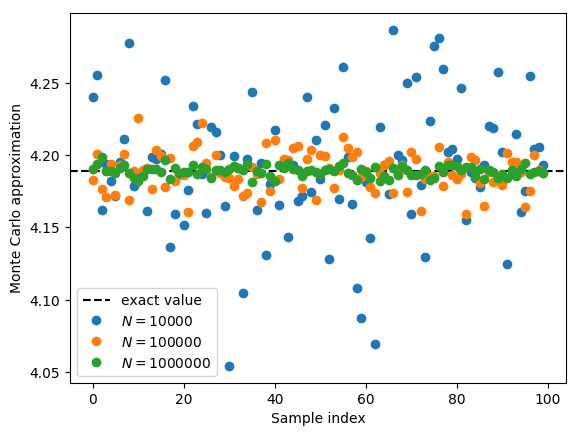

PyObject <matplotlib.legend.Legend object at 0x7fc118fb3e48>

In [23]:
figure()

axhline(exact, color="k", ls="--", label="exact value")
plot(appr_1, "o", label=L"N=10000")
plot(appr_2, "o", label=L"N=100000")
plot(appr_3, "o", label=L"N=1000000")

ylabel("Monte Carlo approximation")
xlabel("Sample index")

legend()

## The deviation around the mean quantifies the integration error

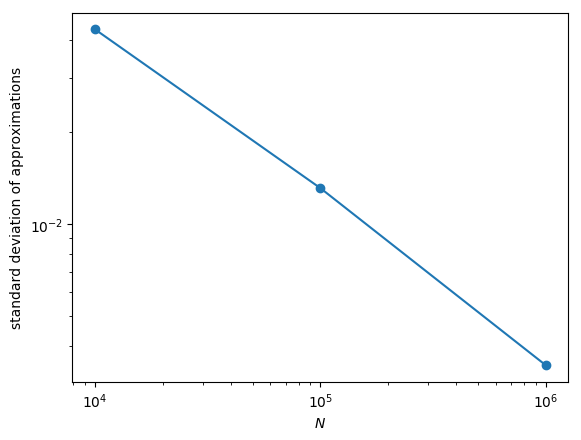

PyObject Text(24.00000000000002, 0.5, 'standard deviation of approximations')

In [24]:
# The standard deviation from the mean decreases like 1/√N
using Statistics

Ns = [10000, 100000, 1000000]
stds = [std(appr_1), std(appr_2), std(appr_3)]

figure()
loglog(Ns, stds, "o-")
xlabel(L"N")
ylabel("standard deviation of approximations")

In [25]:
# slope -1/2!
polyfit(log10.(Ns), log10.(stds), 1)

Poly(0.8430391545679646 - 0.5490837099627287*x)

## Random variables

In [26]:
# Uniformly random between 0 and 1
xs = rand(200)

200-element Array{Float64,1}:
 0.9433586227610908  
 0.7898084962182499  
 0.2232070515325495  
 0.8710217425924045  
 0.20719023361798228 
 0.9096355302012338  
 0.6559985588009563  
 0.3873994666188756  
 0.64693083265059    
 0.25308876111662615 
 0.578079181415222   
 0.9904698319268346  
 0.6768146728125448  
 ⋮                   
 0.021008477031027928
 0.08010660669579228 
 0.8636901405843558  
 0.7427111822091612  
 0.046343940754212776
 0.9114511873945337  
 0.9588003777737661  
 0.30277804241316497 
 0.5394405609544248  
 0.8143796415196054  
 0.018750484815268198
 0.8820697613303143  

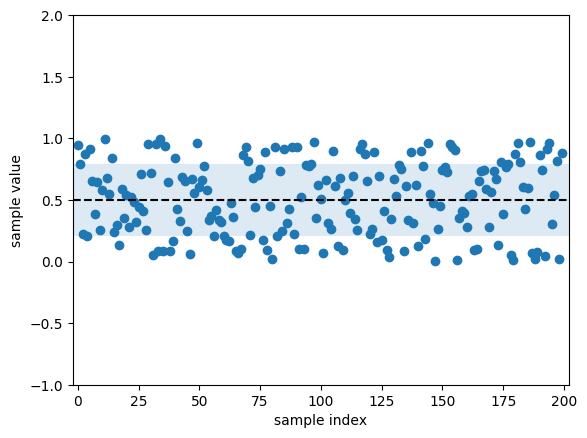

PyObject Text(24.000000000000007, 0.5, 'sample value')

In [28]:
figure()

plot(xs, "o")
axhline(0.5, ls="--", color="k")

# standard deviation
fill_between([-10, 210], 0.5-0.29, 0.5+0.29, alpha=0.15)

ylim(-1, 2)
xlim(-2, 202)

xlabel("sample index")
ylabel("sample value")

## Sampling from non-uniform distributions

In [29]:
# generate samples

x = rand(50000);

In [31]:
# apply function
fx = -log.(x);

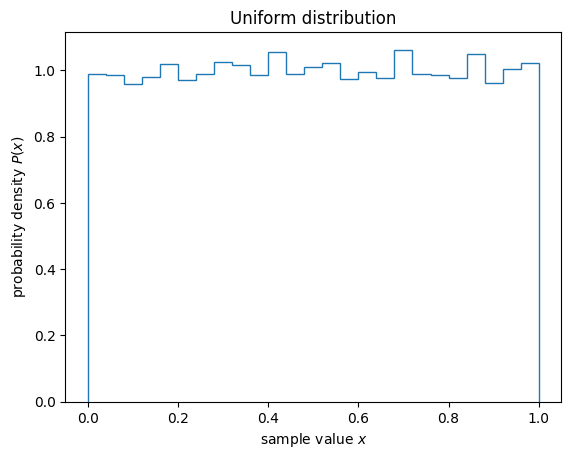

PyObject Text(0.5, 1.0, 'Uniform distribution')

In [32]:
# distributions
figure()
hist(x, range=(0, 1), bins=25, density=true, histtype="step")

xlabel(L"sample value $x$")
ylabel(L"probability density $P(x)$")
title("Uniform distribution")

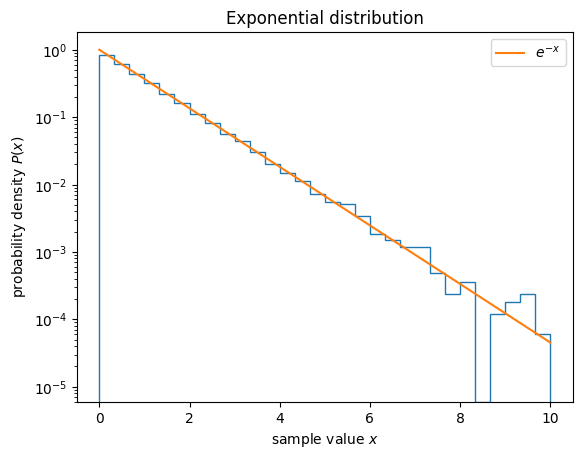

PyObject Text(0.5, 1.0, 'Exponential distribution')

In [33]:
# distributions
figure()
hist(fx, range=(0, 10), bins=30, density=true, histtype="step", log=true)

semilogy(LinRange(0.0, 10.0, 100), exp.(-LinRange(0.0, 10.0, 100)), label=L"e^{-x}")

legend()
xlabel(L"sample value $x$")
ylabel(L"probability density $P(x)$")
title("Exponential distribution")

## Importance sampling

Let's try to compute the integral
$$
I = \int_0^1 2(1-x) e^{x} dx = 2(e - 2) \approx 1.43656
$$

using Monte Carlo integration, by sampling from
the nonuniform distribution 

$$
P(x) = 2(1-x)
$$
on the interval $[0,1]$.
In order to convert from the uniform to the nonuniform distribution,
we need to solve

$$
|f'(x)| = \frac{1}{2(1-f(x))}.
$$

The general solution of this ODE is

$$
f(x) = 1 \pm \sqrt{1-x+C}.
$$

By demanding that the interval bounds of $[0,1]$ are mapped to $[0, 1]$,
we find
$$
f(x) = 1 - \sqrt{1-x}.
$$

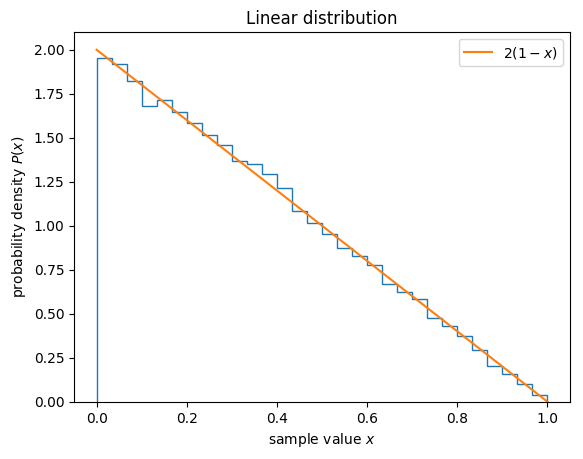

PyObject Text(0.5, 1.0, 'Linear distribution')

In [34]:
# Uniformly random samples
x = rand(50000)

# apply function
fx = 1 .- sqrt.(1 .- x)

# Histogram the distribution
figure()
hist(fx, range=(0, 1), bins=30, density=true, histtype="step")

plot(LinRange(0.0, 1.0, 100),2*(1 .- LinRange(0.0, 1.0, 100)), label=L"2(1-x)")

legend()
xlabel(L"sample value $x$")
ylabel(L"probability density $P(x)$")
title("Linear distribution")

In [35]:
function integrate_mc_nonuniform(f, a, b, N, sample)
    """ Integrate f over [a, b]
    with N samples using Monte Carlo integration
    by sampling from the nonuniform distribution using sample,
    which must provide points from [a, b]
    """    
    S = 0.0
    V = b - a
    for i=1:N
        # sample a point from dist
        x = sample()
        
        S += f(x)
    end
    
    return S*(V/N)
end

integrate_mc_nonuniform (generic function with 1 method)

In [36]:
f(x) = 2(1 - x)*exp(x)
N = 100

# uniform
integrate_mc_nonuniform(f, 0.0, 1.0, N, rand)

1.4102770438425207

In [37]:
g(x) = exp(x)
N = 100

# nonuniform
sample() = 1.0 - sqrt(1.0 - rand())

integrate_mc_nonuniform(g, 0.0, 1.0, N, sample)

1.473115742313799

In [38]:
# convergence
Ns = 10.0 .^(1:5)

stds_uniform = [std([integrate_mc_nonuniform(f, 0.0, 1.0, N, rand) for i=1:100]) for N in Ns]
stds_nonuniform = [std([integrate_mc_nonuniform(g, 0.0, 1.0, N, sample) for i=1:100]) for N in Ns]

5-element Array{Float64,1}:
 0.13127886290676197  
 0.03826965033635913  
 0.012152295504580338 
 0.003412521643706995 
 0.0011572798515993373

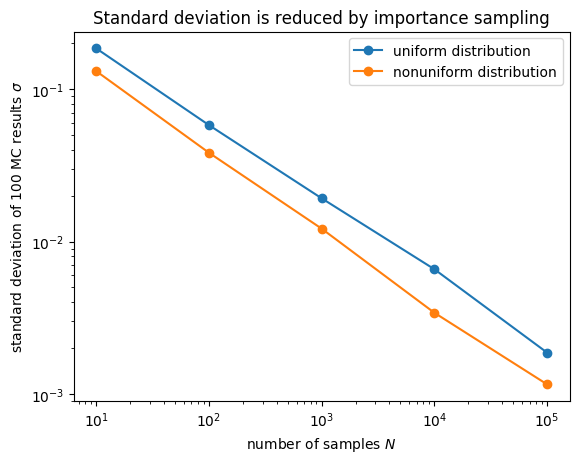

PyObject Text(0.5, 1.0, 'Standard deviation is reduced by importance sampling')

In [39]:
figure()

loglog(Ns, stds_uniform, "-o", label="uniform distribution")
loglog(Ns, stds_nonuniform, "-o", label="nonuniform distribution")

legend()
xlabel(L"number of samples $N$")
ylabel(L"standard deviation of 100 MC results $\sigma$")
title("Standard deviation is reduced by importance sampling")